## 8.1 이미지 로드하기

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [9]:
#이미지를 로드한다.
image = cv2.imread("./images/plane.jpg",cv2.IMREAD_GRAYSCALE)

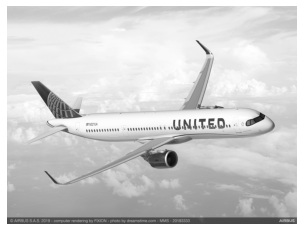

In [10]:
#이미지를 출력한다.
plt.imshow(image, cmap ='gray'),plt.axis('off')
plt.show()

In [11]:
#데이터 타입을 확인한다.
type(image)

numpy.ndarray

In [15]:
image
#각 행렬의 원소의 의미 = 픽셀 강도
#검정색(0) ~ 흰색(255)

array([[203, 203, 203, ..., 202, 203, 203],
       [203, 203, 203, ..., 201, 201, 202],
       [203, 203, 203, ..., 199, 200, 200],
       ...,
       [ 73,  73,  74, ...,  86,  88,  98],
       [ 74,  74,  73, ...,  86,  89, 100],
       [ 74,  74,  73, ...,  86,  89, 100]], dtype=uint8)

In [16]:
image.shape

(2250, 3000)

In [17]:
#컬러로 이미지를 로드한다.
image_bgr = cv2.imread("./images/plane.jpg", cv2.IMREAD_COLOR)

In [18]:
image_bgr[0,0]

array([240, 209, 176], dtype=uint8)

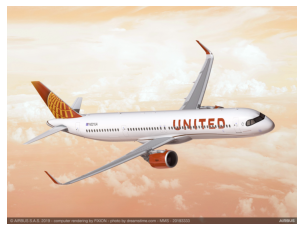

In [25]:
plt.imshow(image_bgr),plt.axis('off')
plt.show()

In [26]:
#OpenCV는 BGR을 사용하고 Matplotlib과 대부분의 어플리케이션은 RGB를 사용
#컬러를 올바르게 출력하기 위해 RGB로 바꿔줘야 한다.
#RGB로 변환
image_rgb= cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)


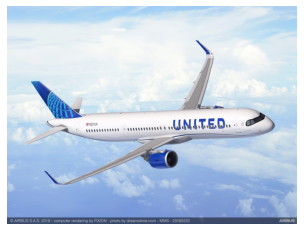

In [27]:
#이미지를 출력한다.
plt.imshow(image_rgb),plt.axis('off')
plt.show()

## 8.2 이미지 저장하기

In [28]:
#흑백 이미지로 로드한다.
image = cv2.imread("./images/plane.jpg",cv2.IMREAD_GRAYSCALE)

In [29]:
#흑백의 이미지를 저장한다.
cv2.imwrite("./images/plane_new.jpg",image)

True

## 8.3 이미지 크기 변경하기 

In [30]:
#이미지 크기를 50x50 픽셀로 바꾼다.
image_50x50 = cv2.resize(image, (50,50))

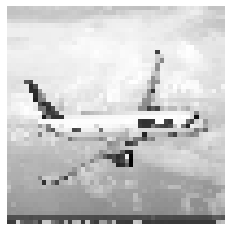

In [31]:
plt.imshow(image_50x50, cmap='gray'),plt.axis('off')
plt.show()

 - 이미지 크기 변경 이유
     - 특성으로 사용하기 위해선 동일한 차원으로 만들어 줘야한다.
     - 이미지 크기를 줄여 메모리 사용량을 크게 줄일 수 있다.
 - 이미지 표준화의 단점
      - 이미지는 행렬에 정보를 담고 있기 때문에 이미지를 줄이면 행렬의 크기와 거기에 담긴 정보도 줄어든다.

## 8.4 이미지 자르기

In [36]:
#이미지 로드
image = cv2.imread("./images/plane.jpg",cv2.IMREAD_GRAYSCALE)

In [37]:
image.shape

(2250, 3000)

In [38]:
#열의 절반과 모든 행을 선택한다.
image_cropped =image[:,:1500]

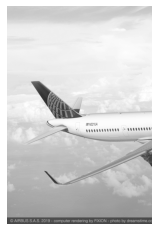

In [39]:
plt.imshow(image_cropped,cmap='gray'),plt.axis('off')
plt.show()

 - 이미지에서 특정 부분을 남기고 싶을 때 사용가능
 - 예시) 고정된 감시 카메라에서 얻은 이미지에서 특정 관심 영역만 남기고 이미지를 자를 수 있다.

## 8.5 이미지 흐리게 하기

In [40]:
#흑백 이미지 로드
image =cv2.imread('./images/plane.jpg',cv2.IMREAD_GRAYSCALE)

In [54]:
#이미지를 흐리게 한다.
#각 픽셀을 주변값의 평균값으로 변환한다.
#주변 픽셀에 수행되는 연산을 커널이라고 한다.
# 다음 예는 픽셀 주변의 50 X 50 커널 평균값으로 블러를 설정
image_blurry = cv2.blur(image,(50,50))

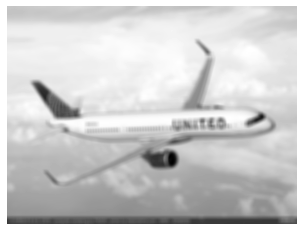

In [55]:
plt.imshow(image_blurry,cmap='gray'),plt.axis('off')
plt.show()

In [56]:
#커널 크기의 영향을 비교하기 위해 500 x 500
image_blurry = cv2.blur(image,(500,500))

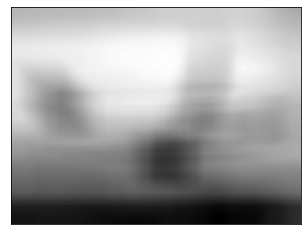

In [63]:
plt.imshow(image_blurry, cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()

In [67]:
#커널 작동하는 방식
kernel = np.ones((50,50))/2500.0

In [68]:
kernel

array([[0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004],
       [0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004],
       [0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004],
       ...,
       [0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004],
       [0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004],
       [0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004]])

In [69]:
#커널을 적용한다.
image_kernel = cv2.filter2D(image, -1, kernel)


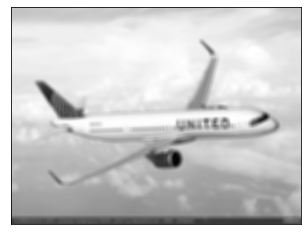

In [70]:
plt.imshow(image_kernel, cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()

  - blur함수는 각 픽셀에 커널 개수의 역수를 곱하여 모두 더한다.

In [104]:
#자주 사용하는 다른 함수는 가우시안 블러이다.

#가우시안 블러를 적용한다.
image_very_blurry = cv2.GaussianBlur(image,(105,105),0)

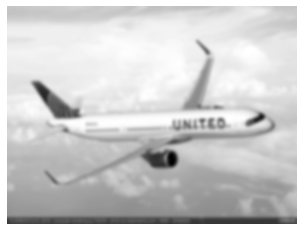

In [105]:
plt.imshow(image_very_blurry, cmap='gray'),plt.axis('off')
plt.show()

In [99]:
#gaus_blur안에서 적용되는 계산
gaus_vector =cv2.getGaussianKernel(105,0)

In [107]:
gaus_vector[:5]

array([[0.0001347 ],
       [0.0001643 ],
       [0.00019964],
       [0.00024165],
       [0.00029137]])

In [101]:
gaus_kernel = np.outer(gaus_vector,gaus_vector)
gaus_kernel

array([[1.81427761e-08, 2.21304187e-08, 2.68905737e-08, ...,
        2.68905737e-08, 2.21304187e-08, 1.81427761e-08],
       [2.21304187e-08, 2.69945146e-08, 3.28009150e-08, ...,
        3.28009150e-08, 2.69945146e-08, 2.21304187e-08],
       [2.68905737e-08, 3.28009150e-08, 3.98562465e-08, ...,
        3.98562465e-08, 3.28009150e-08, 2.68905737e-08],
       ...,
       [2.68905737e-08, 3.28009150e-08, 3.98562465e-08, ...,
        3.98562465e-08, 3.28009150e-08, 2.68905737e-08],
       [2.21304187e-08, 2.69945146e-08, 3.28009150e-08, ...,
        3.28009150e-08, 2.69945146e-08, 2.21304187e-08],
       [1.81427761e-08, 2.21304187e-08, 2.68905737e-08, ...,
        2.68905737e-08, 2.21304187e-08, 1.81427761e-08]])

In [102]:
image_kernel = cv2.filter2D(image,-1,gaus_kernel)
# 두번째 매개변수는 픽셀값의 범위를 지정하는 것으로 -1이면 입력과 동일한 범위를 유지한다.

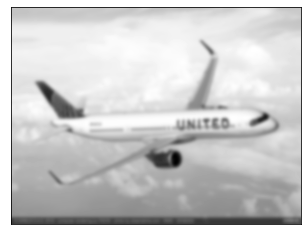

In [103]:
plt.imshow(image_kernel,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()

## 8.6 이미지 선명하게 하기

In [112]:
image = cv2.imread('./images/plane.jpg',cv2.IMREAD_GRAYSCALE)

In [160]:
kernel = np.array([[0,-1,0],
                 [-1,4.8,-1],
                 [0,-1,0]])

In [161]:
#이미지를 선명하게 만든다.
image_sharp = cv2.filter2D(image, -1, kernel)


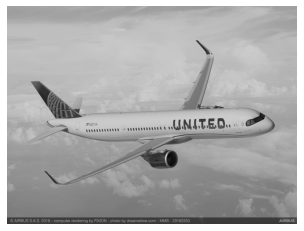

In [162]:
# 선명한 이미지를 출력
plt.imshow(image_sharp, cmap ='gray'),plt.axis('off')
plt.show()

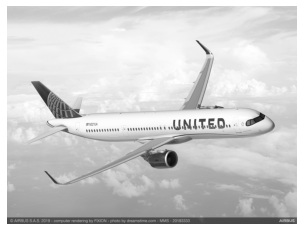

In [138]:
#원본 이미지 출력
plt.imshow(image, cmap='gray'),plt.axis('off')
plt.show()

 - 선명하게 만들어주는 방법은 흐리게 하는 것과 비슷하다
 - 주변 픽셀값의 평균을 계산하는 방법대신 중앙픽셀을 부각하는 커널을 만든다.

## 8.7 대비 높이기

In [165]:
#equalizeHist 함수를 이용한다.

#이미지 대비를 향상시킨다.
image_enhanced = cv2.equalizeHist(image)

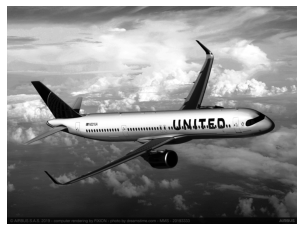

In [166]:
plt.imshow(image_enhanced, cmap='gray'),plt.axis('off')
plt.show()

In [168]:
#컬러의 이미지는 YUV컬러 포멧으로 변환해야한다.
# Y = 밝기, U,V = 컬러
# equalizeHist 이후 RGB 나 BGR로 바꾼다.

image_bgr = cv2.imread('./images/plane.jpg')

In [169]:
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)

In [170]:
#히스토그램 평활화를 적용
image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])

In [ ]:
#RGB로 바꾼다.
imgae_rgb= cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)